In [24]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
import re

In [6]:
df = pd.read_csv("en.openfoodfacts.org.products.tsv", delimiter='\t', encoding='utf-8')

In [19]:
df.shape

(356027, 163)

In [7]:
pd.set_option('display.max_rows', len(df))
pd.set_option('display.max_columns', 163)
df.head(50)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN

### extract all the nutrient columns

In [13]:
col = df.columns.tolist()
nutrient_list = []

rule1 = re.compile(r'_100g$')
def search_name(x):
    if rule1.search(x) is not None:
        return x
    else:
        return ''

for i in col:
    temp = search_name(i)
    if temp != '':
        nutrient_list = nutrient_list + [temp]

In [16]:
nutrient_list.remove('nutrition-score-fr_100g')
nutrient_list.remove('nutrition-score-uk_100g')

In [20]:
# use only 20000 rows temporarily for faster computation
nutrient_df = df.loc[:20000, nutrient_list]

In [21]:
nutrient_df.shape

(20001, 98)

In [27]:
nutrient_df.head()

,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,glycemic-index_100g,water-hardness_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2243.0,NaN,28.57,28.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.018,64.29,14.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.6,3.57,NaN,NaN,NaN,0.00000,0.000,NaN,0.0,NaN,NaN,NaN,NaN,0.0214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1941.0,NaN,17.86,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000,60.71,17.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1,17.86,NaN,NaN,NaN,0.63500,0.250,NaN,0.0,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2540.0,NaN,57.14,5.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.86,3.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1,17.86,NaN,NaN,NaN,1.22428,0.482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.143,NaN,0.00514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1552.0,NaN,1.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
nutrient_df_miss_vals = pd.DataFrame(nutrient_df.isna().mean()).reset_index()
nutrient_df_miss_vals.columns = ["Columns", "MV Rate"]
nutrient_df_miss_vals = miss_vals.sort_values("MV Rate")

/Users/aaronchan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


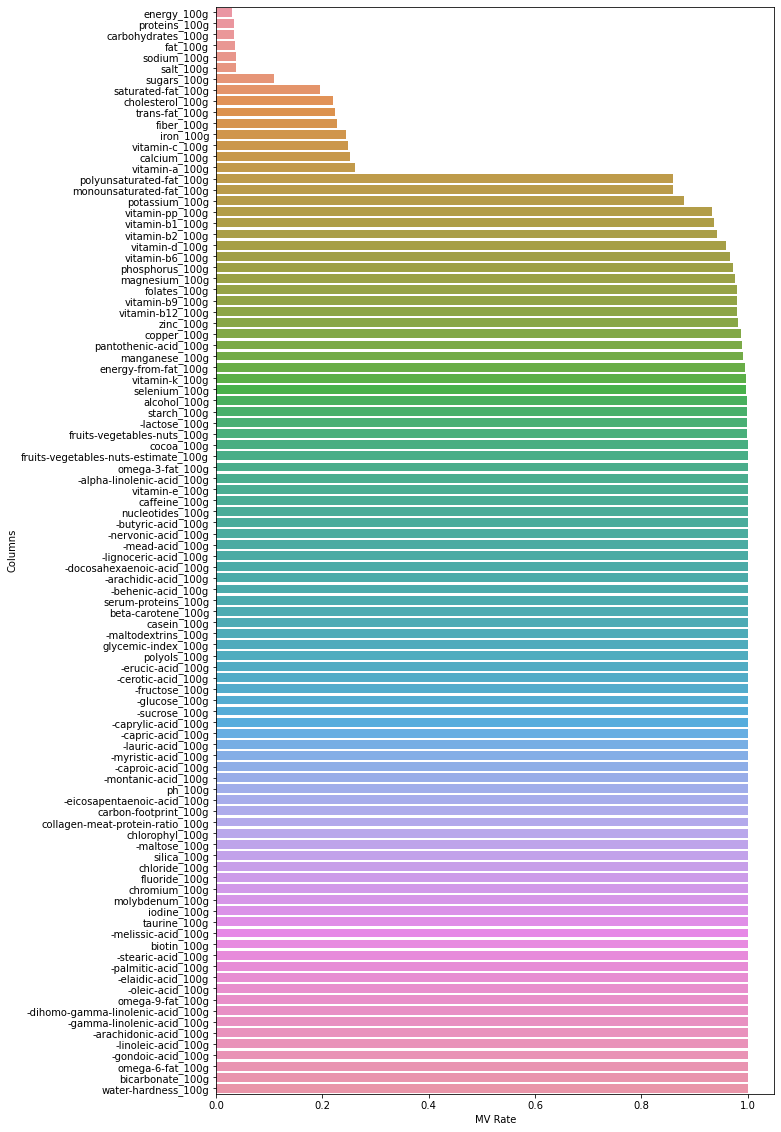

In [40]:
matplotlib.rcParams['figure.figsize'] = [10, 20]

sns.barplot("MV Rate", "Columns", data = nutrient_df_miss_vals, orient = "h")
plt.show()

In [42]:
keep_cols = miss_vals[miss_vals["MV Rate"] < 0.3]["Columns"]

0            energy_100g
49         proteins_100g
38    carbohydrates_100g
2               fat_100g
54           sodium_100g
             ...        
48            fiber_100g
77             iron_100g
61        vitamin-c_100g
75          calcium_100g
56        vitamin-a_100g
Name: Columns, Length: 15, dtype: object

In [44]:
less_missing_nutrient_df = nutrient_df[keep_cols]
less_missing_nutrient_df.head()

,energy_100g,proteins_100g,carbohydrates_100g,fat_100g,sodium_100g,salt_100g,sugars_100g,saturated-fat_100g,cholesterol_100g,trans-fat_100g,fiber_100g,iron_100g,vitamin-c_100g,calcium_100g,vitamin-a_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2243.0,3.57,64.29,28.57,0.000,0.00000,14.29,28.57,0.018,0.0,3.6,0.00129,0.0214,0.000,0.0
2,1941.0,17.86,60.71,17.86,0.250,0.63500,17.86,0.00,0.000,0.0,7.1,0.00129,0.0000,0.071,0.0
3,2540.0,17.86,17.86,57.14,0.482,1.22428,3.57,5.36,NaN,NaN,7.1,0.00514,NaN,0.143,NaN
4,1552.0,8.57,77.14,1.43,NaN,NaN,NaN,NaN,NaN,NaN,5.7,NaN,NaN,NaN,NaN


In [45]:
less_missing_nutrient_df.shape

(20001, 15)

In [71]:
less_missing_nutrient_df.describe()

,energy_100g,proteins_100g,carbohydrates_100g,fat_100g,sodium_100g,salt_100g,sugars_100g,saturated-fat_100g,cholesterol_100g,trans-fat_100g,fiber_100g,iron_100g,vitamin-c_100g,calcium_100g,vitamin-a_100g
count,19388.000000,19320.000000,19318.000000,19302.000000,19257.000000,19257.000000,17838.000000,16087.000000,15608.000000,15540.000000,15450.000000,15117.000000,15037.000000,14963.000000,14780.000000
mean,1115.085403,6.468949,32.595135,12.484011,0.808699,2.054095,16.698567,4.995662,0.019624,0.112249,2.656623,0.003374,0.011128,0.131942,0.000144
std,822.108179,8.291655,29.442481,18.291818,4.637537,11.779343,21.484109,7.828253,0.116848,3.193473,4.343886,0.164507,0.318358,4.280245,0.000601
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,326.000000,0.000000,6.450000,0.000000,0.024000,0.060960,1.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1105.000000,3.700000,21.430000,3.570000,0.250000,0.635000,6.670000,1.790000,0.000000,0.000000,1.400000,0.000900,0.000000,0.033000,0.000000
75%,1674.000000,9.260000,60.000000,20.000000,0.595000,1.511300,25.000000,7.140000,0.022000,0.000000,3.600000,0.002250,0.002800,0.107000,0.000107
max,5690.000000,100.000000,100.000000,100.000000,342.857000,870.856780,100.000000,92.860000,13.846000,369.000000,100.000000,19.200000,35.714300,522.727000,0.025714


In [72]:
less_missing_nutrient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   energy_100g         19388 non-null  float64
 1   proteins_100g       19320 non-null  float64
 2   carbohydrates_100g  19318 non-null  float64
 3   fat_100g            19302 non-null  float64
 4   sodium_100g         19257 non-null  float64
 5   salt_100g           19257 non-null  float64
 6   sugars_100g         17838 non-null  float64
 7   saturated-fat_100g  16087 non-null  float64
 8   cholesterol_100g    15608 non-null  float64
 9   trans-fat_100g      15540 non-null  float64
 10  fiber_100g          15450 non-null  float64
 11  iron_100g           15117 non-null  float64
 12  vitamin-c_100g      15037 non-null  float64
 13  calcium_100g        14963 non-null  float64
 14  vitamin-a_100g      14780 non-null  float64
dtypes: float64(15)
memory usage: 2.3 MB


In [48]:
def Diff(li1, li2):
    return (list(list(set(li1)-set(li2)) + list(set(li2)-set(li1))))

In [50]:
otherVariableList = Diff(col, nutrient_list)

In [89]:
# other df

# use only 20000 rows temporarily for faster computation
other_df = df.loc[:, otherVariableList]

In [90]:
other_df_miss_vals = pd.DataFrame(other_df.isna().mean()).reset_index()
other_df_miss_vals.columns = ["Columns", "MV Rate"]
other_df_miss_vals = other_df_miss_vals.sort_values("MV Rate")
other_df_miss_vals

,Columns,MV Rate
8,last_modified_datetime,0.000000
11,last_modified_t,0.000000
3,created_t,0.000008
36,creator,0.000008
5,created_datetime,0.000028
...,...,...
0,allergens_en,0.999944
58,nutrition_grade_uk,1.000000
51,ingredients_from_palm_oil,1.000000
4,ingredients_that_may_be_from_palm_oil,1.000000


In [68]:
other_df_miss_vals = pd.DataFrame(other_df.isna().mean()).reset_index()
other_df_miss_vals.columns = ["Columns", "MV Rate"]
other_df_miss_vals = other_df_miss_vals.sort_values("MV Rate")

/Users/aaronchan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


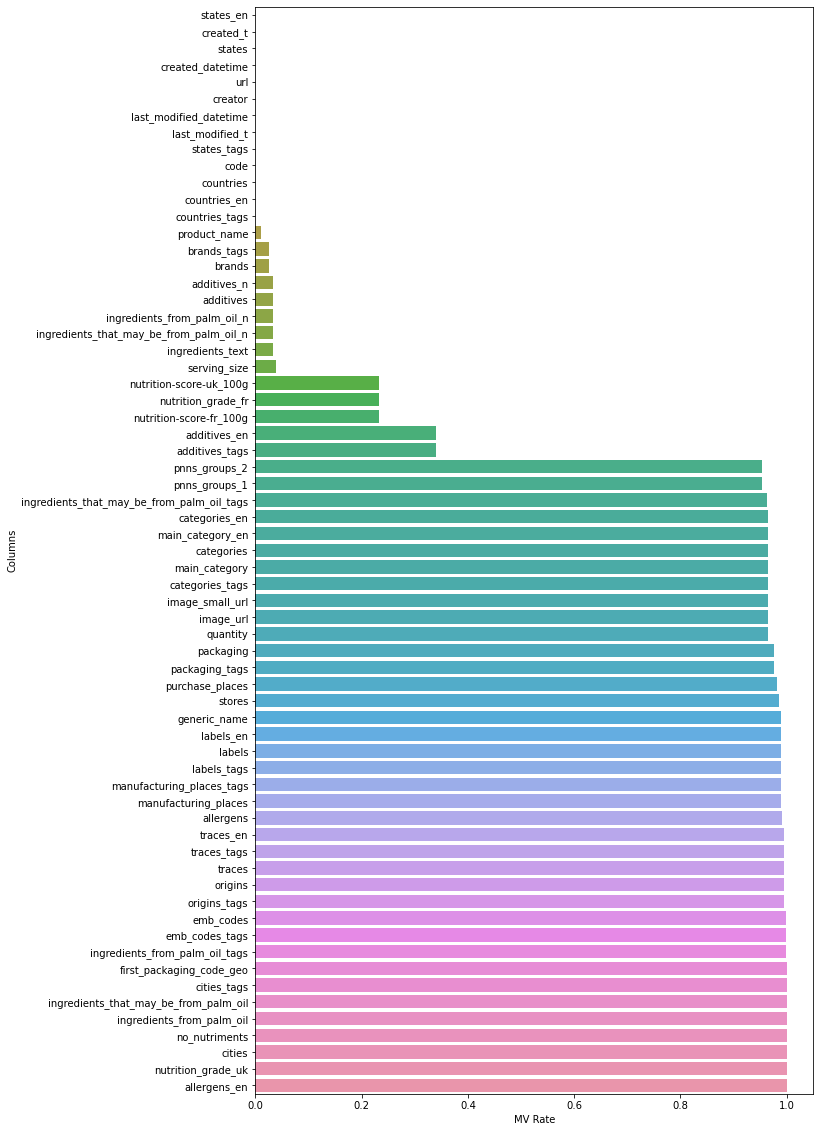

In [69]:
matplotlib.rcParams['figure.figsize'] = [10, 20]

sns.barplot("MV Rate", "Columns", data = other_df_miss_vals, orient = "h")
plt.show()

In [70]:
other_df.head()

,allergens_en,ingredients_that_may_be_from_palm_oil_tags,product_name,created_t,ingredients_that_may_be_from_palm_oil,created_datetime,nutrition-score-fr_100g,emb_codes,last_modified_datetime,cities_tags,packaging_tags,last_modified_t,states_tags,additives_tags,ingredients_text,countries_tags,categories_en,no_nutriments,pnns_groups_2,first_packaging_code_geo,labels_tags,additives,quantity,manufacturing_places,stores,labels,brands,origins_tags,traces,nutrition_grade_fr,allergens,generic_name,packaging,ingredients_from_palm_oil_n,pnns_groups_1,categories,creator,categories_tags,main_category_en,code,image_url,url,ingredients_that_may_be_from_palm_oil_n,purchase_places,cities,labels_en,additives_en,main_category,brands_tags,emb_codes_tags,additives_n,ingredients_from_palm_oil,origins,image_small_url,ingredients_from_palm_oil_tags,serving_size,countries_en,countries,nutrition_grade_uk,traces_tags,nutrition-score-uk_100g,manufacturing_places_tags,states,traces_en,states_en
0,NaN,NaN,Farine de blé noir,1474103866,NaN,2016-09-17T09:17:46Z,NaN,NaN,2016-09-17T09:18:13Z,NaN,NaN,1474103893,"en:to-be-completed,en:nutrition-facts-to-be-co...",NaN,NaN,en:france,NaN,NaN,NaN,NaN,NaN,NaN,1kg,NaN,NaN,NaN,Ferme t'y R'nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,openfoodfacts-contributors,NaN,NaN,3087,NaN,http://world-en.openfoodfacts.org/product/0000...,NaN,NaN,NaN,NaN,NaN,NaN,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:FR,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...",NaN,"To be completed,Nutrition facts to be complete..."
1,NaN,NaN,Banana Chips Sweetened (Whole),1489069957,NaN,2017-03-09T14:32:37Z,14.0,NaN,2017-03-09T14:32:37Z,NaN,NaN,1489069957,"en:to-be-completed,en:nutrition-facts-complete...",NaN,"Bananas, vegetable oil (coconut oil, corn oil ...",en:united-states,NaN,NaN,NaN,NaN,NaN,[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d,NaN,NaN,NaN,0.0,NaN,NaN,usda-ndb-import,NaN,NaN,4530,NaN,http://world-en.openfoodfacts.org/product/0000...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,28 g (1 ONZ),United States,US,NaN,NaN,14.0,NaN,"en:to-be-completed, en:nutrition-facts-complet...",NaN,"To be completed,Nutrition facts completed,Ingr..."
2,NaN,NaN,Peanuts,1489069957,NaN,2017-03-09T14:32:37Z,0.0,NaN,2017-03-09T14:32:37Z,NaN,NaN,1489069957,"en:to-be-completed,en:nutrition-facts-complete...",NaN,"Peanuts, wheat flour, sugar, rice flour, tapio...",en:united-states,NaN,NaN,NaN,NaN,NaN,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,NaN,NaN,NaN,Torn & Glasser,NaN,NaN,b,NaN,NaN,NaN,0.0,NaN,NaN,usda-ndb-import,NaN,NaN,4559,NaN,http://world-en.openfoodfacts.org/product/0000...,0.0,NaN,NaN,NaN,NaN,NaN,torn-glasser,NaN,0.0,NaN,NaN,NaN,NaN,28 g (0.25 cup),United States,US,NaN,NaN,0.0,NaN,"en:to-be-completed, en:nutrition-facts-complet...",NaN,"To be completed,Nutrition facts completed,Ingr..."
3,NaN,NaN,Organic Salted Nut Mix,1489055731,NaN,2017-03-09T10:35:31Z,12.0,NaN,2017-03-09T10:35:31Z,NaN,NaN,1489055731,"en:to-be-completed,en:nutrition-facts-complete...",NaN,"Organic hazelnuts, organic cashews, organic wa...",en:united-states,NaN,NaN,NaN,NaN,NaN,[ organic-hazelnuts -> en:organic-hazelnuts ...,NaN,NaN,NaN,NaN,Grizzlies,NaN,NaN,d,NaN,NaN,NaN,0.0,NaN,NaN,usda-ndb-import,NaN,NaN,16087,NaN,http://world-en.openfoodfacts.org/product/0000...,0.0,NaN,NaN,NaN,NaN,NaN,grizzlies,NaN,0.0,NaN,NaN,NaN,NaN,28 g (0.25 cup),United States,US,NaN,NaN,12.0,NaN,"en:to-be-completed, en:nutrition-facts-complet...",NaN,"To be completed,Nutrition facts completed,Ingr..."
4,NaN,NaN,Organic Polenta,1489055653,NaN,2017-03-09T10:34:13Z,NaN,NaN,2017-03-09T10:34:13Z,NaN,NaN,1489055653,"en:to-be-completed,en:nutrition-facts-complete...",NaN,Organic polenta,en:united-states,NaN,NaN,NaN,NaN,NaN,[ organic-polenta -> en:organic-polenta ] [...,NaN,NaN,NaN,NaN,Bob's Red Mill,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,usda-ndb-import,NaN,NaN,16094,NaN,http://world-en.openfoodfacts.org/product/0000...,0.0,NaN,NaN,NaN,NaN,NaN,bob-s-red

#### by Countries

In [81]:
other_df["countries_en"].unique()

array(['France', 'United States', 'United Kingdom',
       'France,United States', 'Canada', 'Switzerland', 'Spain',
       'Germany', 'Slovenia', 'Bangladesh', 'Italy', 'Romania',
       'Australia', 'Portugal', 'France,United Kingdom',
       'Belgium,France,Netherlands,United Kingdom', 'Guadeloupe',
       'United Kingdom,United States', 'Dominican Republic',
       'Canada,United States', 'Netherlands', 'Australia,France',
       'Canada,France,Switzerland,United States', 'Ireland',
       'France,Réunion', 'Taiwan', 'Australia,Belgium,Switzerland',
       'France,Germany', 'Brazil', 'Belgium,France',
       'Australia,United States', 'Mexico', 'Saudi Arabia',
       'United Arab Emirates', 'Iraq', 'Kuwait', 'Moldova', 'France,Iraq',
       'New Caledonia', nan, 'Singapore', 'Finland',
       'Sweden,United States', 'French Polynesia', 'France,Switzerland',
       'Australia,New Zealand,Singapore,Thailand,United States',
       'France,French Polynesia', 'Panama', 'Costa Rica',
   

In [75]:
other_df["countries_en"].isna().mean()

0.00014999250037498125

In [92]:
other_df.shape

(356027, 65)

In [96]:
country = other_df['countries_en'].value_counts().head(20).to_frame()
country_count = country.style.background_gradient(cmap='Reds')
country_count

,countries_en
United States,173159
France,123961
Switzerland,14932
Germany,8470
Spain,5529
United Kingdom,5092
Belgium,2936
Australia,2201
Russia,1582
"France,Switzerland",1492


#### by Brands

In [94]:
brands = other_df['brands'].value_counts().head(20).to_frame()
brands_count = brands.style.background_gradient(cmap='Reds')
brands_count

,brands
Carrefour,3670
Auchan,3217
U,2608
Casino,2091
Leader Price,2015
Meijer,1995
Kroger,1662
Cora,1374
Ahold,1370
Spartan,1341


In [79]:
other_df["additives_en"].unique()

array([nan, 'E307c - Tocopherol', 'E322 - Lecithins,E322i - Lecithin',
       ..., 'E339 - Sodium phosphates,E508 - Potassium chloride',
       'E101 - Riboflavin,E101i - Riboflavin,E129 - Allura red ac,E375 - Nicotinic acid',
       'E101 - Riboflavin,E101i - Riboflavin,E129 - Allura red ac,E330 - Citric acid,E375 - Nicotinic acid'],
      dtype=object)

## Need a research question

comparing nutrients by countries?

comparing nutrients by brands?

## Part 2 Text

In [102]:
other_df["ingredients_text"][1]

'Bananas, vegetable oil (coconut oil, corn oil and/or palm oil) sugar, natural banana flavor.'

In [103]:
other_df["additives"][2]


' [ peanuts -> en:peanuts  ]  [ wheat-flour -> en:wheat-flour  ]  [ flour -> en:flour  ]  [ sugar -> en:sugar  ]  [ rice-flour -> en:rice-flour  ]  [ flour -> en:flour  ]  [ tapioca-starch -> en:tapioca-starch  ]  [ starch -> en:starch  ]  [ salt -> en:salt  ]  [ leavening -> en:leavening  ]  [ ammonium-bicarbonate -> en:ammonium-bicarbonate  ]  [ bicarbonate -> en:bicarbonate  ]  [ baking-soda -> en:baking-soda  ]  [ soda -> en:soda  ]  [ soy-sauce -> en:soy-sauce  ]  [ sauce -> en:sauce  ]  [ water -> en:water  ]  [ soybeans -> en:soybeans  ]  [ wheat -> en:wheat  ]  [ salt -> en:salt  ]  [ potato-starch -> en:potato-starch  ]  [ starch -> en:starch  ] '